In [1]:
#import libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
#load data set
df = pd.read_csv("data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
X_cluster = df[['Annual Income (k$)', 'Spending Score (1-100)' ]]

Text(0.5, 1.0, 'Annual Income VS Spending Score')

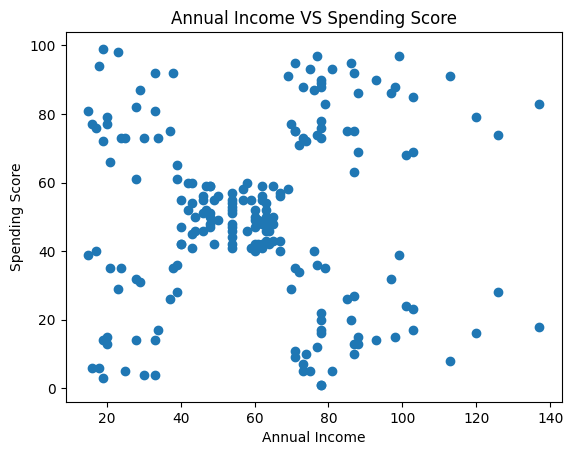

In [12]:
#visualizing for the original data
plt.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income VS Spending Score')

In [13]:
Kmeans = KMeans(n_clusters=5)
df['Cluster'] = Kmeans.fit_predict(X_cluster)

Text(0.5, 1.0, 'Customer Segment Data With Kmeans')

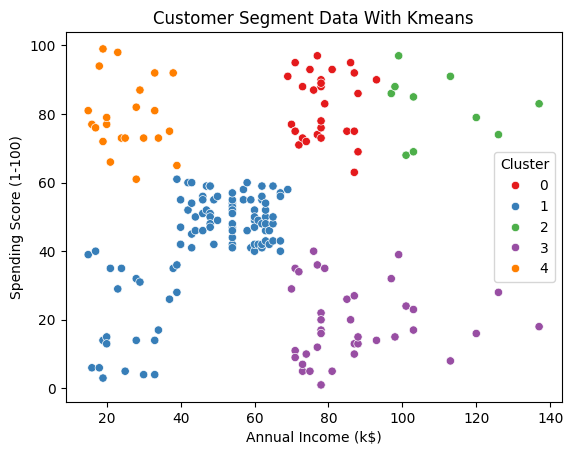

In [14]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title("Customer Segment Data With Kmeans")

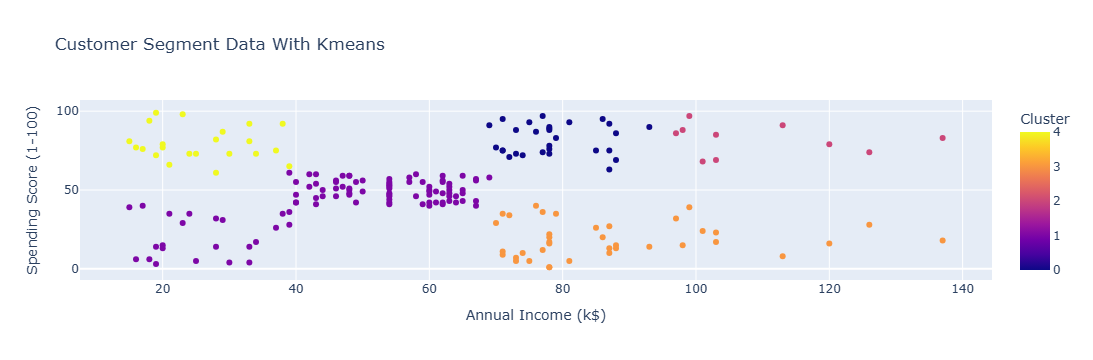

In [15]:
fig = px.scatter(
    df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color='Cluster',
    title="Customer Segment Data With Kmeans"
)

fig.show()

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,4
2,3,0,20,16,6,1
3,4,0,23,16,77,4
4,5,0,31,17,40,1


In [21]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,4
2,3,0,20,16,6,1
3,4,0,23,16,77,4
4,5,0,31,17,40,1


In [51]:
features = ["Annual Income (k$)", "Spending Score (1-100)", "Cluster"]

In [52]:
X = df[features]
y = df[target]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [54]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [55]:
y_pred = model.predict(X_test)

In [56]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report\n:", classification_report(y_test, y_pred))

Accuracy Score: 0.55

Classification Report
:               precision    recall  f1-score   support

           0       0.54      0.90      0.68        21
           1       0.60      0.16      0.25        19

    accuracy                           0.55        40
   macro avg       0.57      0.53      0.46        40
weighted avg       0.57      0.55      0.47        40



Text(0.5, 1.0, 'Customer Segment Cluster By Gender')

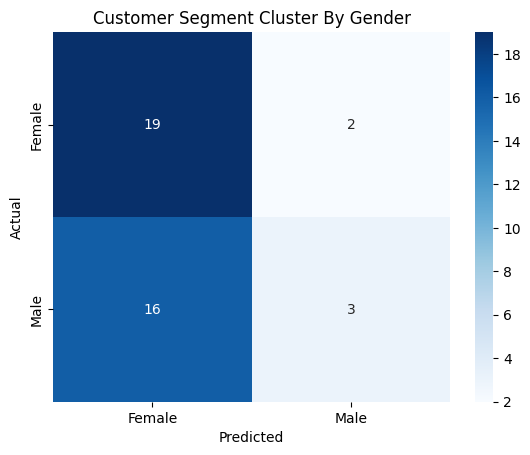

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels= ['Female', 'Male'], yticklabels= ['Female', 'Male'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Customer Segment Cluster By Gender")